In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
#from nifti import NiftiImage
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

# Open data

In [3]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/10003_10004ss2/10003-10004psfkf300Smith0_4_60TS.mat


In [4]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(6885, 300)

In [5]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/10003_10004ss2/10003-10004psfkf300Smith0_4_60IC.nii


In [6]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(176, 105, 9, 300)

In [7]:
S=data.shape
S

(176, 105, 9, 300)

Z-score

In [8]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [9]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [10]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

# Open Masks

In [18]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)
img1 = nb.load(filenameM)
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/10003_10004ss2/10003_10004ss2Registration/10003-10004JFRCTransformedfullpsftrimmed.nii


In [19]:
filenameM='/home/sophie/RegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.split('\t') for Line in content]
RegionName=[Names[i][0] for i in range(75)]
Num=[int(Names[i][2]) for i in range(75)]

# Average in masks to sort components by brain region

In [20]:
Dmaps.shape

(176, 105, 9, 300)

In [21]:
M=np.zeros((S[3],86))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(86)

In [22]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(86):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])

In [23]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],86))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(86):
        J=[l for l in range(74) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(74) if Num[l]==I]
    if J!= []:
        CompMainName[i]=Names[np.array(J)][0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [24]:
J

[35]

AME_R
31
AME_R
51
AME_R
66
AME_R
ME_R
205
accessory medulla


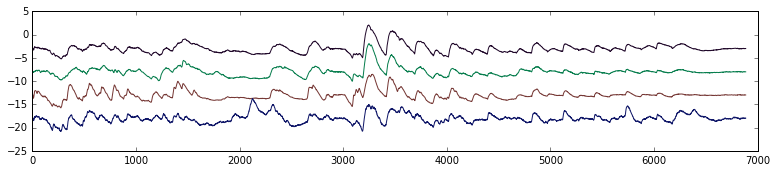

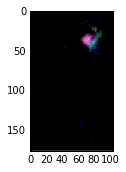

LO_R
LH_R
24
LO_R
29
LO_R
BU_R
LOP_R
47
LO_R
PVLP_R
76
LO_R
ME_R
81
LO_R
ME_R
94
LO_R
PVLP_R
IVLP_R
PLP_R
97
LO_R
PVLP_R
115
LO_R
CAN_R
ME_R
120
LO_R
ME_R
LO_L
134
LO_R
ME_R
PLP_R
136
LO_R
ME_R
BU_L
ME_L
201
lobula


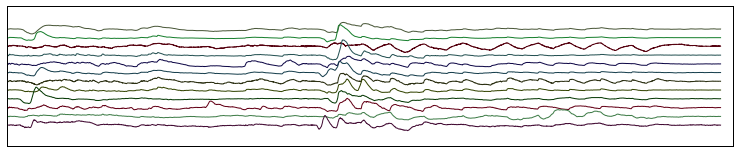

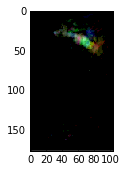

NO
BU_R
AOTU_R
ME_L
88
NO
FB
189
nodulus


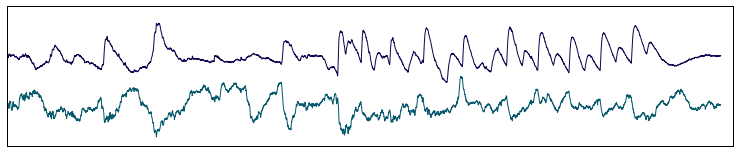

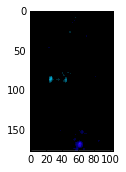

BU_R
ME_R
63
BU_R
CAN_L
126
BU_R
142
NO
BU_R
157
BU_R
175
BU_R
MB_VL_L
231
BU_R
IPS_R
282
bulb


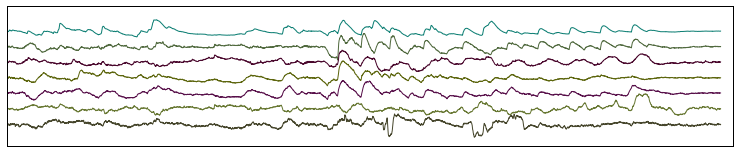

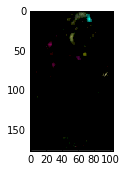

PB
93
PB
111
PB
124
PB
ATL_R
ATL_L
128
PB
232
protocerebral bridge


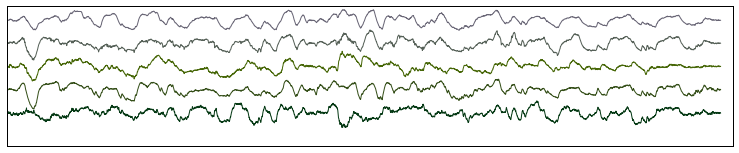

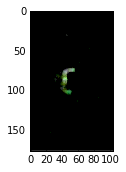

LH_R
MB_CA_R
GA_R
80
LH_R
ME_R
PVLP_R
PLP_R
140
LH_R
163
LH_R
AVLP_R
PVLP_R
184
lateral horn


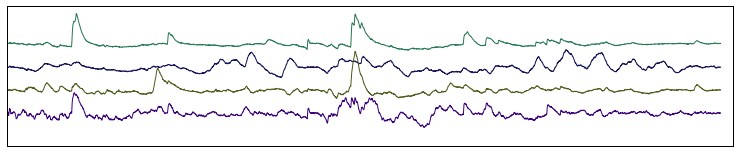

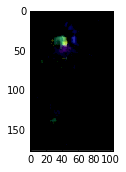

SAD
GNG
117
SAD
GNG
LO_L
127
SAD
IPS_R
GNG
206
saddle


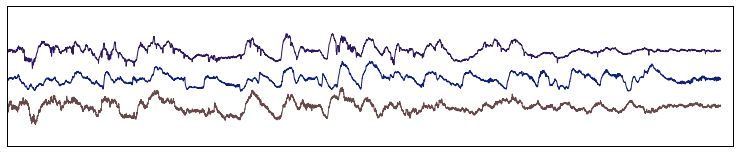

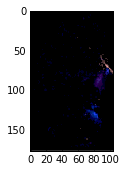

SAD
CAN_R
GNG
43
CAN_R
ME_L
105
CAN_R
FLA_R
FLA_L
112
CAN_R
ME_R
SIP_R
IPS_R
150
CAN_R
ME_R
183
cantle


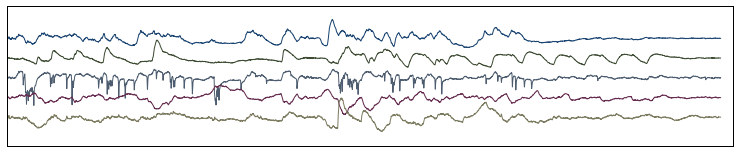

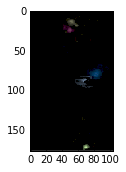

AMMC_R
52
AMMC_R
AVLP_R
IVLP_R
123
antennal mechanosensory and motor center


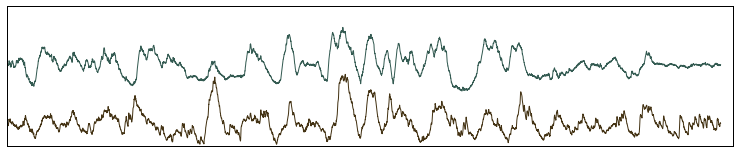

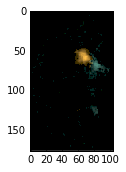

CRE_R
MB_VL_R
SIP_R
SMP_R
95
crepine


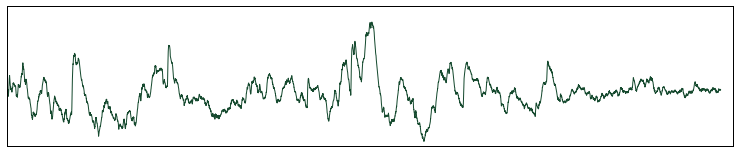

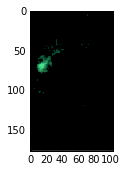

MB_PED_R
MB_VL_R
AOTU_R
MB_VL_L
234
pedunculus of adult mushroom body


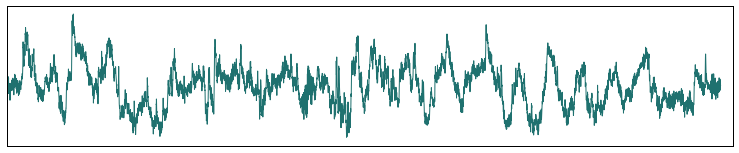

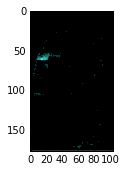

MB_VL_R
MB_ML_R
SIP_R
92
MB_PED_R
MB_VL_R
MB_CA_R
178
SAD
MB_VL_R
ME_R
IPS_L
243
vertical lobe of adult mushroom body


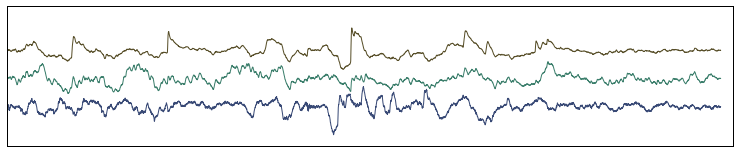

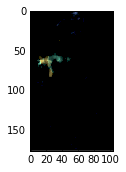

CRE_R
MB_VL_R
MB_ML_R
58
CRE_R
MB_ML_R
129
medial lobe of adult mushroom body


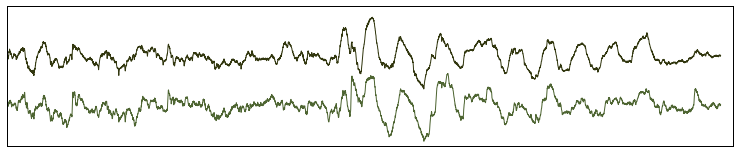

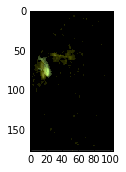

EB
169
EB
FB
203
CAN_R
EB
SMP_R
212
EB
SMP_R
SMP_L
242
EB
FB
251
ellipsoid body


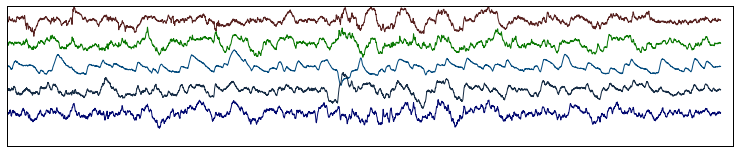

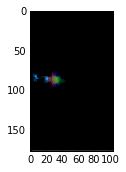

FLA_R
AL_R
AL_L
23
LAL_R
CRE_R
AL_R
GA_R
71
adult antennal lobe


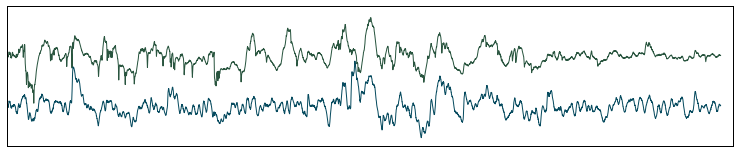

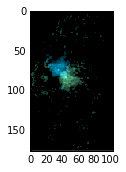

ME_R
0
LO_R
ME_R
4
ME_R
BU_L
9
LO_R
ME_R
11
ME_R
12
ME_R
14
LO_R
ME_R
19
LO_R
ME_R
20
LO_R
ME_R
30
ME_R
34
LO_R
PB
ME_R
36
ME_R
38
ME_R
40
LO_R
LH_R
ME_R
BU_L
44
LH_R
ME_R
48
LO_R
ME_R
CAN_L
56
LO_R
CAN_R
ME_R
59
BU_R
ME_R
62
ME_R
68
LO_R
ME_R
70
ME_R
72
ME_R
BU_L
73
ME_R
77
LO_R
NO
LOP_R
ME_R
78
LO_R
ME_R
79
ME_R
101
ME_R
103
LO_R
ME_R
108
ME_R
118
ME_R
143
ME_R
162
LO_R
ME_R
170
CAN_R
ME_R
180
AME_R
LO_R
FLA_R
ME_R
249
ME_R
254
medulla


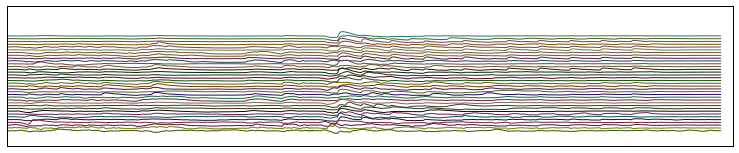

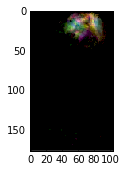

ATL_R
FB
ATL_L
106
NO
FB
224
FB
SMP_R
233
fan-shaped body


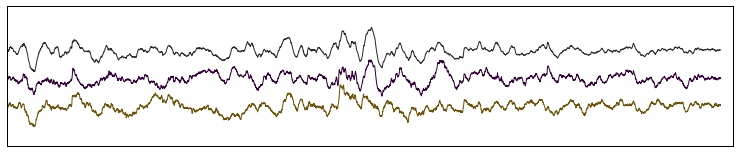

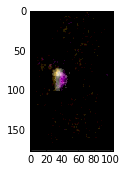

SLP_R
SIP_R
SMP_R
188
SLP_R
287
SLP_R
294
superior lateral protocerebrum


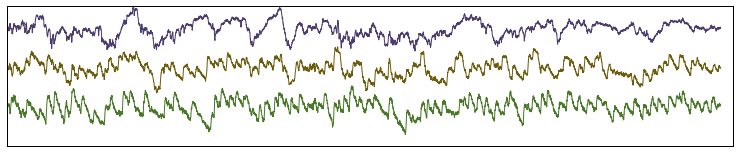

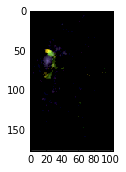

MB_VL_R
SMP_R
177
CRE_R
SMP_R
CRE_L
SMP_L
186
ATL_R
SMP_R
SPS_R
273
superior medial protocerebrum


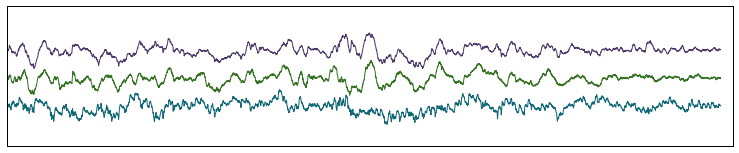

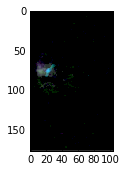

AVLP_R
PVLP_R
22
AVLP_R
AVLP_L
25
AVLP_R
AVLP_L
49
AVLP_R
50
anterior ventrolateral protocerebrum


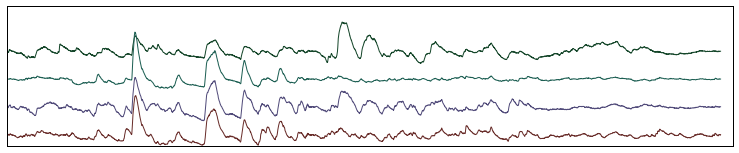

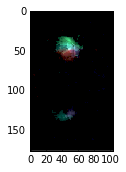

IVLP_R
SPS_R
CAN_L
57
wedge


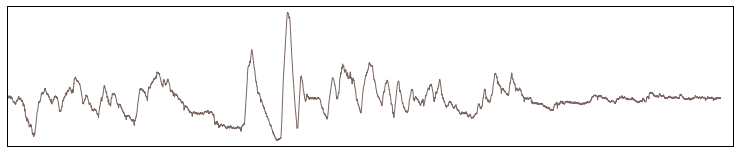

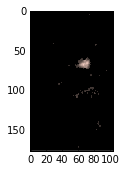

AOTU_R
173
anterior optic tubercle


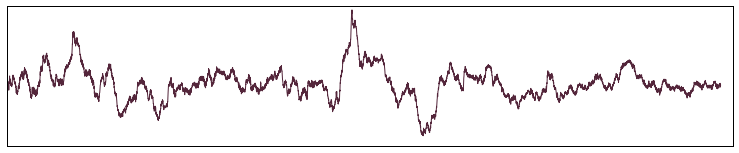

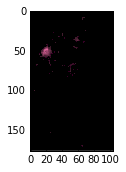

ME_R
PLP_R
MB_CA_R
159
LH_R
MB_CA_R
SCL_R
199
SLP_R
MB_CA_R
SCL_R
220
calyx of adult mushroom body


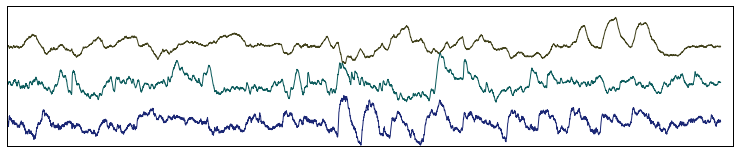

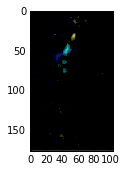

SPS_R
60
SPS_R
269
superior posterior slope


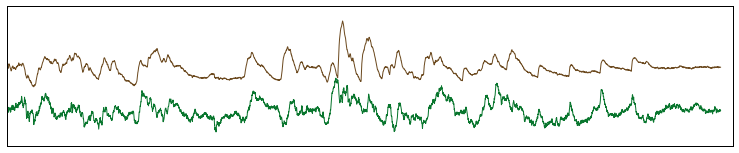

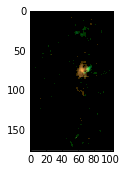

SAD
AMMC_R
IPS_R
21
IPS_R
132
SAD
IPS_R
191
IPS_R
CAN_L
GOR_L
218
BU_R
IPS_R
BU_L
SMP_L
250
IPS_R
272
SAD
IPS_R
275
IPS_R
277
IPS_R
GNG
BU_L
286
IPS_R
295
IPS_R
296
PB
CAN_R
IPS_R
299
inferior posterior slope


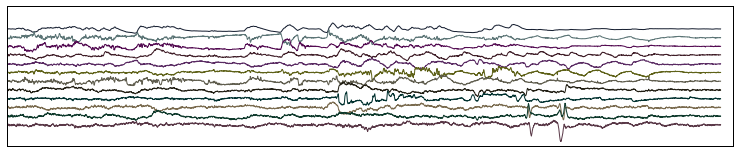

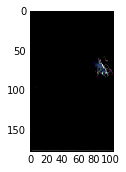

CAN_R
GNG
280
CAN_R
GNG
292
adult gnathal ganglion


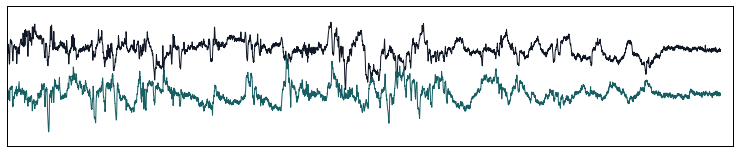

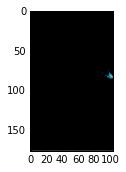

AMMC_R
FLA_R
AL_R
PRW
5
FLA_R
PRW
FLA_L
42
PRW
89
prow


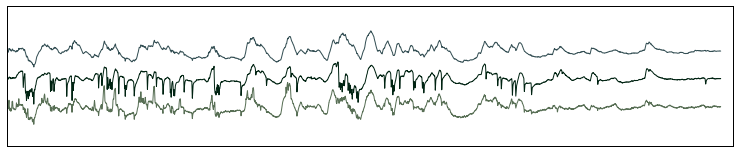

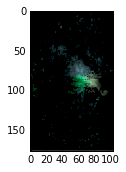

GA_R
AL_L
121
gall


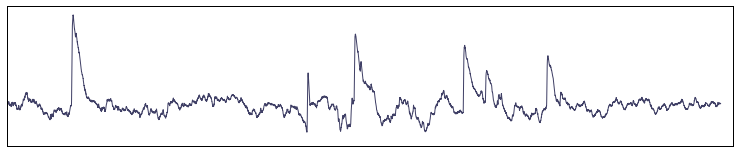

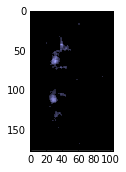

AME_L
100
accessory medulla


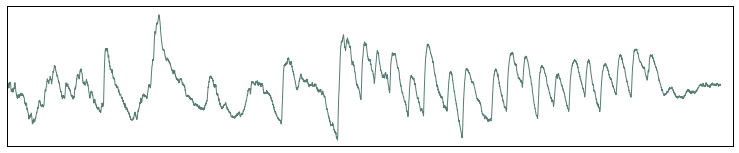

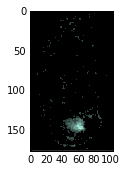

LO_L
PLP_L
41
LO_L
ME_L
109
NO
LO_L
ME_L
114
lobula


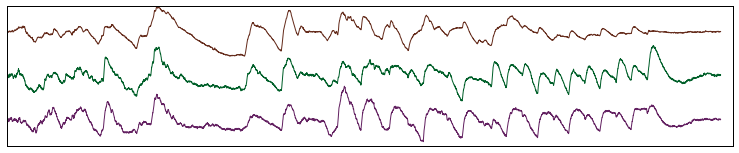

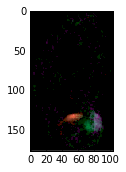

ME_R
BU_L
10
BU_L
ME_L
69
BU_L
ME_L
86
BU_L
119
BU_L
ME_L
156
BU_L
215
MB_CA_R
BU_L
223
CAN_R
BU_L
MB_PED_L
252
bulb


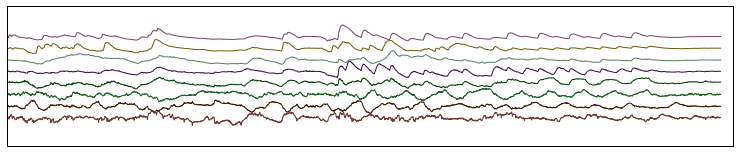

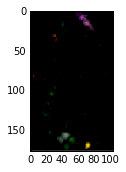

LH_L
MB_CA_L
208
LH_L
245
LH_L
263
lateral horn


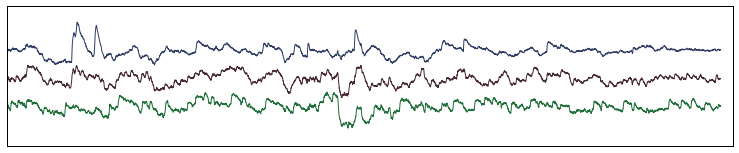

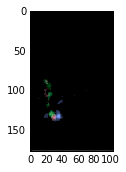

SMP_R
CAN_L
236
cantle


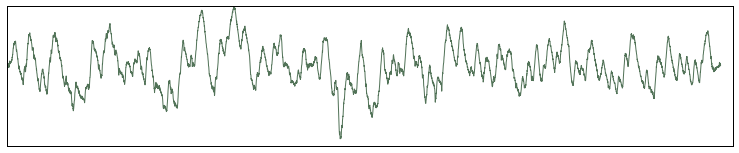

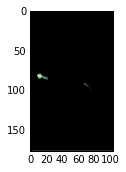

AMMC_L
IVLP_L
18
antennal mechanosensory and motor center


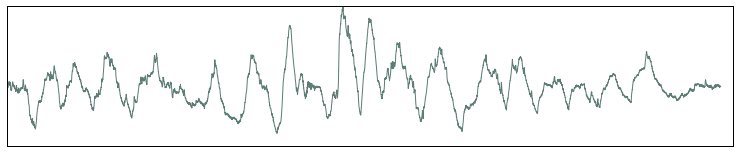

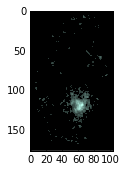

PB
ATL_L
135
antler


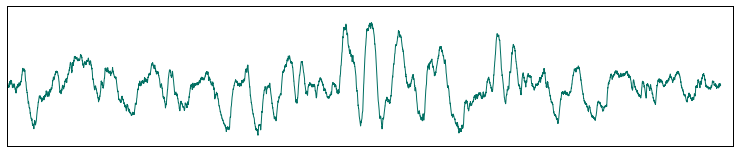

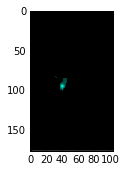

CRE_L
MB_ML_L
54
crepine


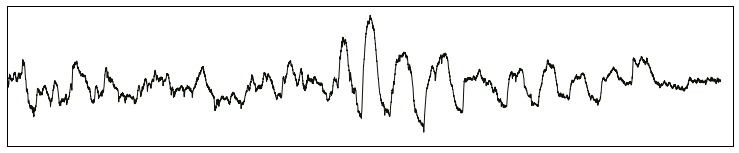

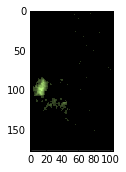

MB_VL_L
MB_ML_L
SIP_L
151
MB_PED_L
MB_VL_L
MB_ML_L
MB_CA_L
196
vertical lobe of adult mushroom body


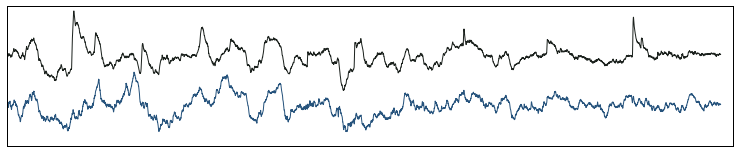

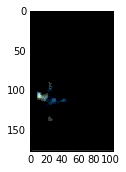

CRE_L
MB_ML_L
154
medial lobe of adult mushroom body


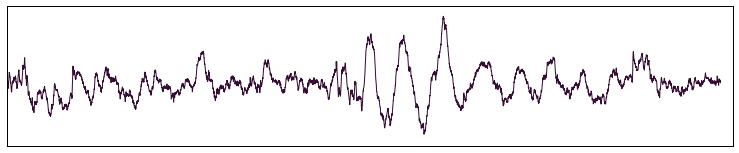

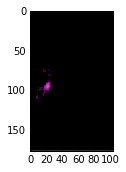

LOP_L
ME_L
13
LO_L
LOP_L
ME_L
39
LOP_L
ME_L
67
lobula plate


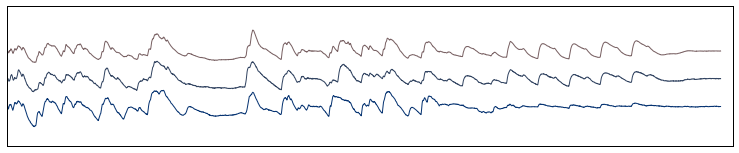

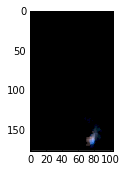

LAL_L
AL_L
82
adult antennal lobe


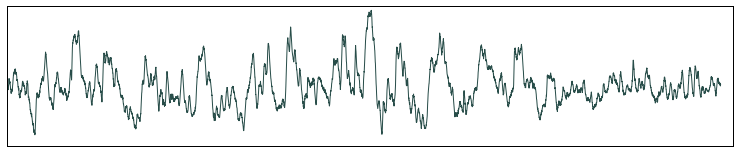

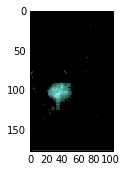

BU_L
LOP_L
ME_L
2
LOP_L
ME_L
7
LOP_L
ME_L
8
ME_L
15
LO_L
ME_L
17
LO_L
LOP_L
ME_L
28
LOP_L
ME_L
32
LO_L
ME_L
33
BU_R
CAN_R
ME_L
37
LO_L
LOP_L
ME_L
45
ME_L
46
LO_R
ME_R
PLP_R
ME_L
53
LO_L
ME_L
55
BU_R
LOP_L
ME_L
65
MB_VL_R
ME_L
85
BU_L
ME_L
91
LO_L
ME_L
102
LO_L
ME_L
104
PLP_R
ME_L
110
FB
ME_L
116
LOP_L
ME_L
130
ME_L
131
PB
BU_L
ME_L
137
LO_L
ME_L
145
ME_L
146
LOP_L
ME_L
149
CAN_R
ME_L
153
LO_L
ME_L
161
PB
AMMC_R
ME_L
171
medulla


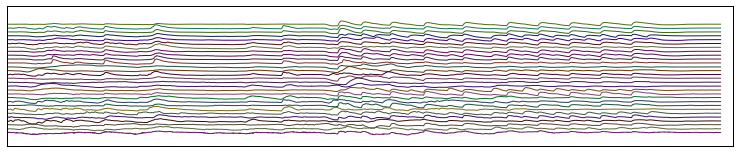

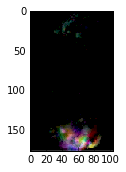

SLP_L
270
superior lateral protocerebrum


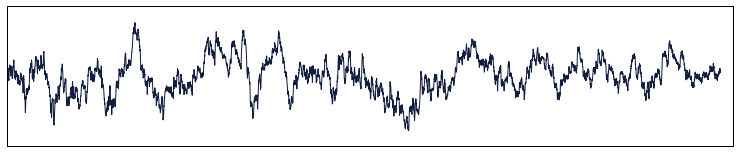

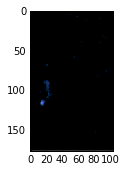

CRE_L
SIP_L
SMP_L
138
superior medial protocerebrum


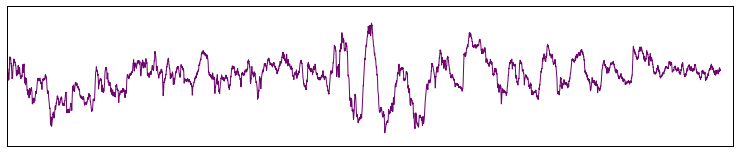

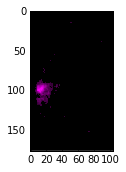

AVLP_L
74
anterior ventrolateral protocerebrum


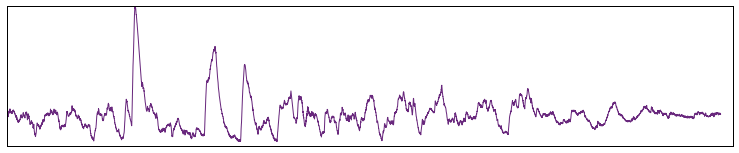

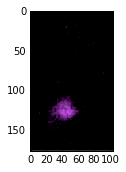

IVLP_L
SPS_L
16
wedge


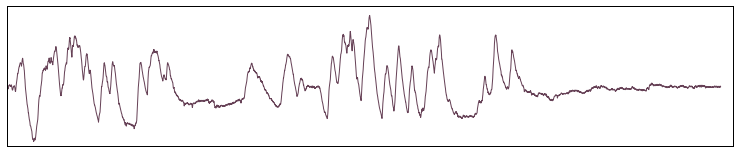

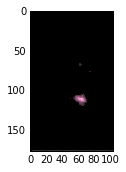

IB_L
SPS_L
83
superior posterior slope


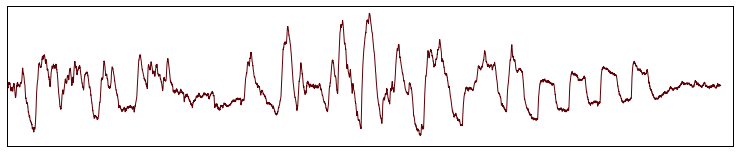

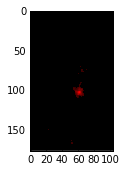

IPS_R
CAN_L
IPS_L
174
IPS_L
179
CAN_L
IPS_L
195
SAD
GNG
IPS_L
209
CAN_R
IPS_R
AMMC_L
IPS_L
238
SAD
IPS_R
GNG
IPS_L
264
IPS_L
278
inferior posterior slope


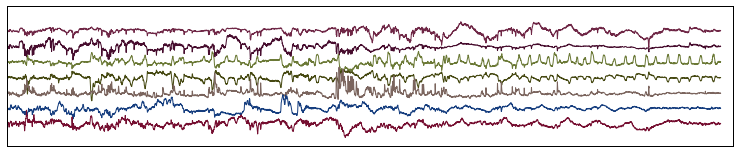

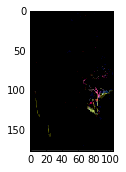

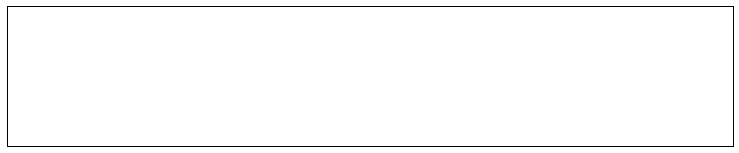

In [25]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
                    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        


##### Looked at the components maps and time series and remove all the components which are localized on the edge of the brain and with activity unlike GCaMP6 transients.


In [27]:
BadICs=[282,206,117,127,112,23,21,132,191,218,250,272,275,277,286,295,296,299,
       280,292,42,252,174,179,195,209,238,264,278]

In [28]:
for idx in BadICs:
    GoodICAnat[idx] = 0.0

# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [29]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

NewOrder=np.argsort(SmallRegion)

SmallRegion[NewOrder]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  8,  8,
        9, 12, 12, 12, 12, 12, 13, 14, 14, 16, 17, 18, 18, 18, 19, 19, 19,
       20, 20, 20, 20, 20, 20, 20, 22, 22, 24, 24, 24, 24, 25, 25, 25, 25,
       25, 26, 26, 26, 26, 27, 28, 28, 28, 28, 29, 30, 30, 31, 32, 32, 32,
       34, 34, 34, 34, 35, 35, 35, 36, 37, 37, 41, 42, 43, 44, 45, 46, 46,
       46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48,
       49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 54, 54, 54, 56,
       56, 57, 58, 60, 62

In [30]:
LargerRegionIndToName = {v: k for k, v in LargerRegionInd.iteritems()}

In [31]:
LargerRegionI

array([ 1,  1,  1, 11,  1, 11, 11,  1,  1,  1,  8,  1,  1,  1,  1,  1,  2,
        1, 11,  1,  1,  3,  2,  4,  1,  2,  3,  3,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, 11, 11,  1,  1,  1,  1,  1,  2,  2,
        1, 11,  1, 10,  1,  1,  2,  5,  1,  3,  8,  1,  8,  5,  1,  1,  1,
        1,  8,  1,  4,  1,  1,  2,  5,  1,  1,  1,  1,  6,  1,  4,  3, 11,
        1,  8,  9,  8, 11,  7,  1,  5,  8,  1, 10, 11,  1,  3,  2,  1,  1,
        1,  1,  1, 11,  8,  5,  1,  1,  1,  8, 11,  7,  1,  1,  1, 11,  1,
        8,  1,  9,  9, 11,  8, 11,  8, 11,  8,  5,  1,  1,  3, 11,  1, 10,
        1,  1,  7,  5,  6,  3,  8,  1,  2,  1,  1,  7,  1,  1, 11,  5,  1,
        1,  5, 11,  8,  8, 11,  5,  5,  1,  1,  6,  3, 11,  8,  2, 11,  8,
        1,  1,  8,  2,  3,  8, 11,  7,  5,  3,  1,  4, 10, 11,  6,  5,  7,
        1,  7,  8,  4,  3, 11, 11,  3,  3,  5,  1, 11,  5, 11,  1,  2,  8,
        8,  1, 11,  8,  6,  3,  1,  1,  8,  5, 10,  8, 11,  3,  3,  8,  5,
       11, 11,  8,  8,  4

In [32]:
GoodICAnat

array([ 1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,
        1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1

OL
0
2
4
7
8
9
11
12
13
14
15
17
19
20
24
28
29
30
31
32
33
34
36
37
38
39
40
41
44
45
46
47
48
51
53
55
56
59
62
65
66
67
68
70
72
73
76
77
78
79
81
85
91
94
97
100
101
102
103
104
108
109
110
114
115
116
118
120
130
131
134
136
137
143
145
146
149
153
161
162
170
171
180
201
205
249
254


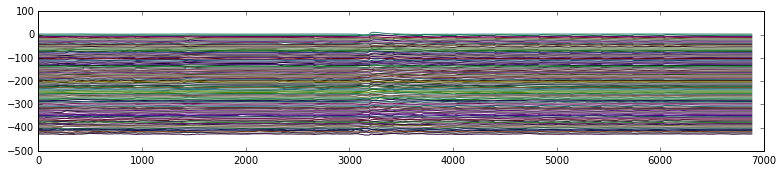

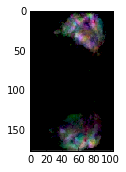

VLNP
16
22
25
49
50
57
74
173


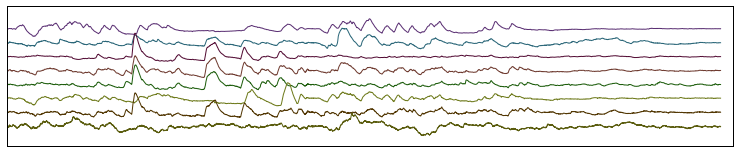

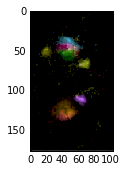

VMNP
60
83
269


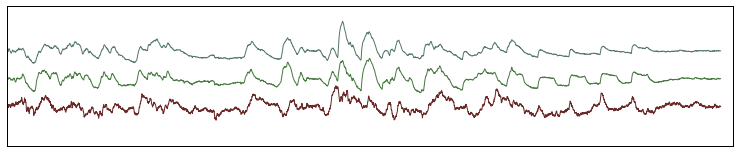

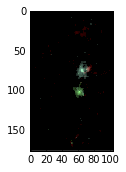

AL
71
82


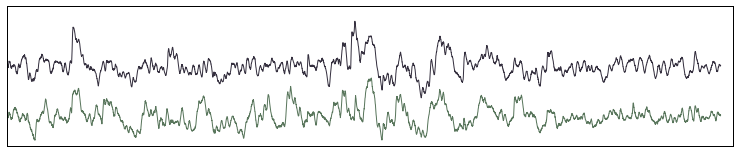

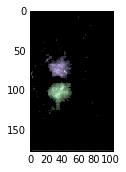

MB
58
92
129
151
154
159
178
196
199
220
234
243


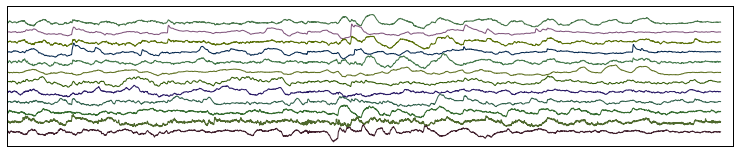

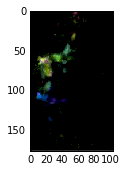

LH
80
140
163
184
208
245
263


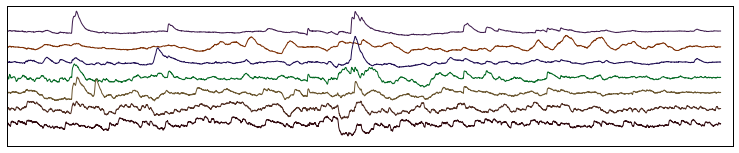

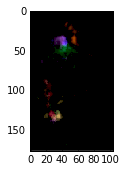

SNP
138
177
186
188
270
273
287
294


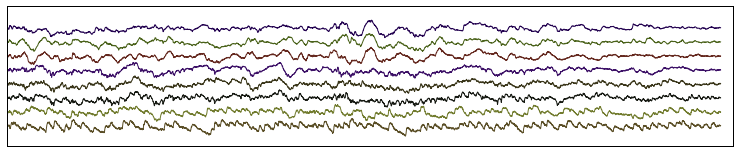

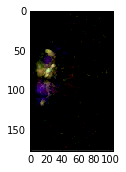

CX
10
63
69
86
88
93
106
111
119
124
126
128
142
156
157
169
175
189
203
212
215
223
224
231
232
233
242
251


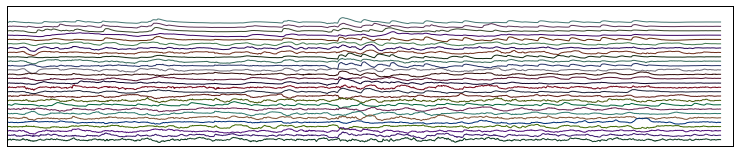

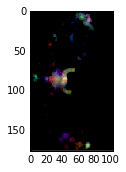

LX
121


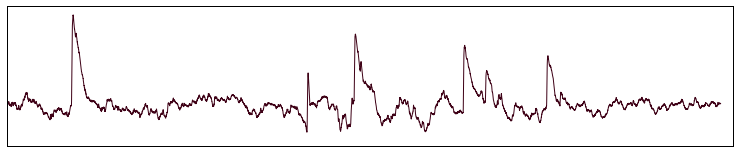

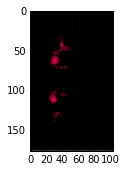

INP
54
95
135


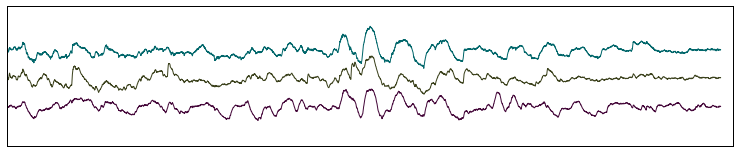

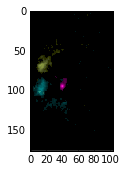

PENP
5
18
43
52
89
105
123
150
183
236


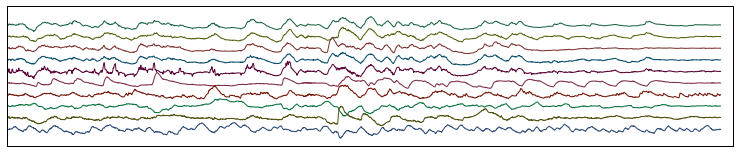

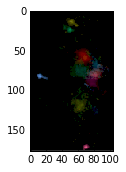

GNG


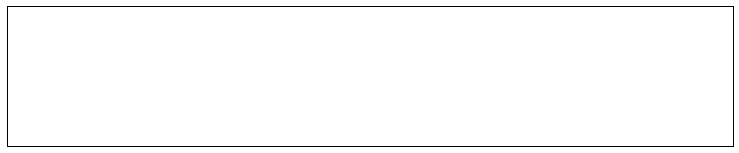

In [33]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
NumberInLargeRegion=np.zeros(13)

for l in range(1,13):
    print(LargerRegionIndToName[l])
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if LargerRegionI[i]==l:          
            if GoodICAnat[i]==1:
                for k in range(3):
                    Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
                Final_maps=Final_maps+Fmap
                #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                tot=tot+1
                print(i)
                n=n+1 
                    
    if n!=0:

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    NumberInLargeRegion[l]=n

In [34]:
# Output number of component per region
np.savetxt('/'.join(filename.split('/')[:-1])+'/NumberInLargeRegions.txt',NumberInLargeRegion)